In [1]:
import pandas as pd
import sklearn as sk
import numpy as np

Introduction

1) Brief background on the dataset and regression problem to solve.

   The information relates to residences located in a certain California district and includes summary statistics about them based on data from the 1990 census.We will be using regression model to predit the median_house_value


Data Exploration (inputs and target)

Loading the Dataset

In [2]:
housing_data=pd.read_csv("housing.csv")
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
print(housing_data.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


Examine the input features - data types, distributions, summary statistics, correlations, etc.

In [9]:
Input= housing_data[['median_income','households','housing_median_age','total_rooms','latitude','longitude','population','total_bedrooms']]


In [5]:
#summary statistics
Input.describe()

,median_income,households,housing_median_age,total_rooms,latitude,longitude,population
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,499.539680,28.639486,2635.763081,35.631861,-119.569704,1425.476744
std,1.899822,382.329753,12.585558,2181.615252,2.135952,2.003532,1132.462122
min,0.499900,1.000000,1.000000,2.000000,32.540000,-124.350000,3.000000
25%,2.563400,280.000000,18.000000,1447.750000,33.930000,-121.800000,787.000000
50%,3.534800,409.000000,29.000000,2127.000000,34.260000,-118.490000,1166.000000
75%,4.743250,605.000000,37.000000,3148.000000,37.710000,-118.010000,1725.000000
max,15.000100,6082.000000,52.000000,39320.000000,41.950000,-114.310000,35682.000000


In [6]:
#data types
Input.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   median_income       20640 non-null  float64
 1   households          20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   latitude            20640 non-null  float64
 5   longitude           20640 non-null  float64
 6   population          20640 non-null  float64
dtypes: float64(7)
memory usage: 1.1 MB


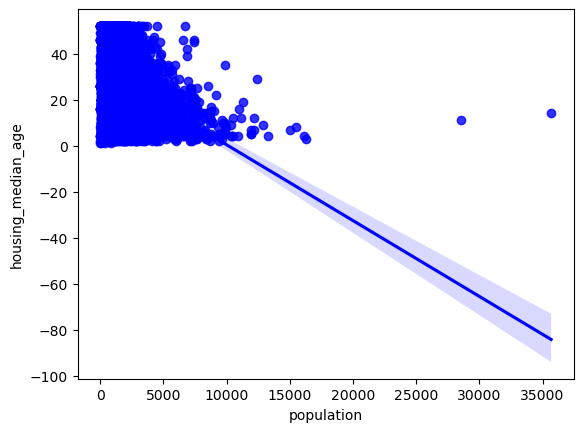

In [7]:
#CORRELATION
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x="population",y="housing_median_age",data=Input,color="blue")
plt.show()
# With increse in house age people leavig there decreases

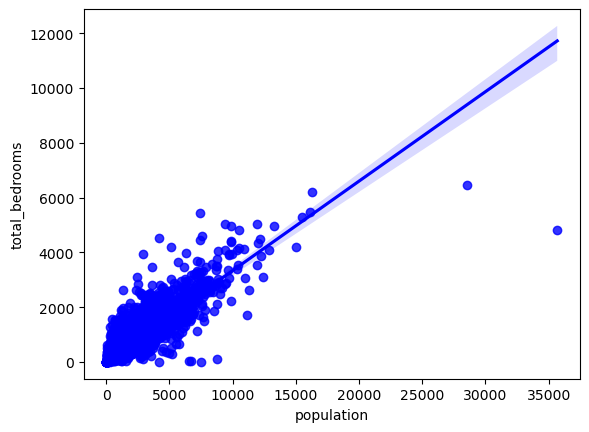

In [10]:
sns.regplot(x="population",y="total_bedrooms",data=Input,color="blue")
plt.show()
#With increase in bendrooms people leaving there increases

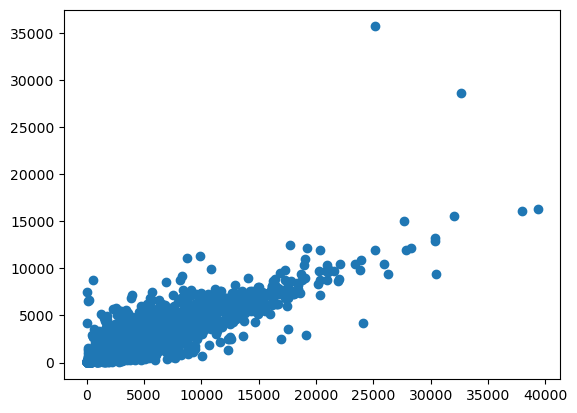

In [11]:
#Distributions
x=Input["total_rooms"]
y=Input["population"]
plt.scatter(x,y)

(array([1.7525e+04, 2.5580e+03, 3.7200e+02, 1.0300e+02, 4.9000e+01,
        1.6000e+01, 7.0000e+00, 6.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([2.00000e+00, 3.93380e+03, 7.86560e+03, 1.17974e+04, 1.57292e+04,
        1.96610e+04, 2.35928e+04, 2.75246e+04, 3.14564e+04, 3.53882e+04,
        3.93200e+04]),
 <BarContainer object of 10 artists>)

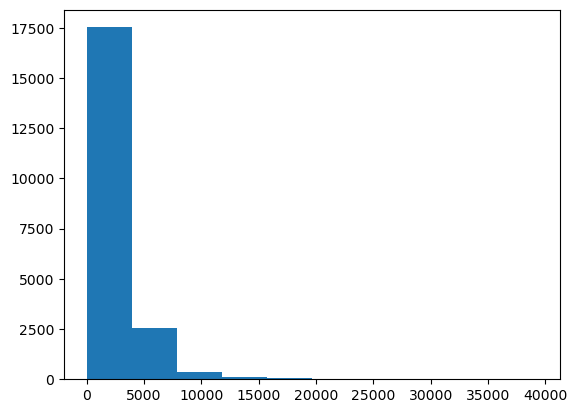

In [12]:
plt.hist(Input["total_rooms"])

Examine the target variable - distribution, summary stats

In [13]:
Output=housing_data["median_house_value"]
Output

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

(array([ 877., 3612., 4099., 3771., 2799., 1769., 1239.,  752.,  479.,
        1243.]),
 array([ 14999. ,  63499.2, 111999.4, 160499.6, 208999.8, 257500. ,
        306000.2, 354500.4, 403000.6, 451500.8, 500001. ]),
 <BarContainer object of 10 artists>)

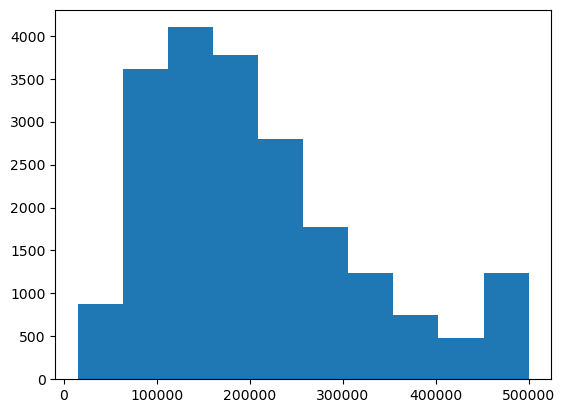

In [14]:
plt.hist(Output)

In [15]:
Output.describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

Create visualizations to understand relationships between inputs and target (scatter plots, histograms, etc.)


Text(0.5, 0, 'no of rooms')

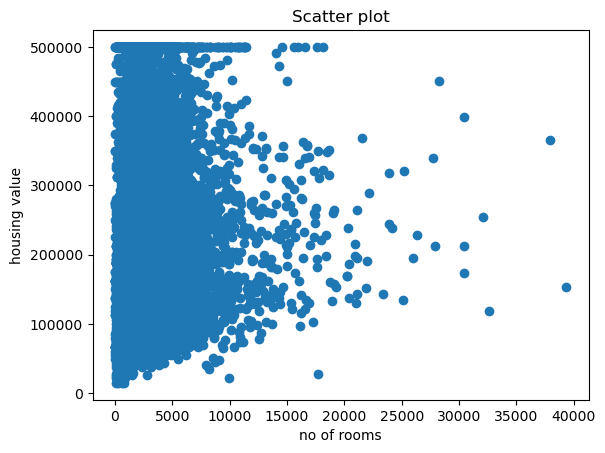

In [16]:
#Scatter plots
x=Input["total_rooms"]
y=Output
plt.scatter(x,y)
plt.title("Scatter plot")
plt.ylabel("housing value")
plt.xlabel("no of rooms")

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': 'ocean_proximity_INLAND'}>,
        <Axes: title={'center': 'ocean_proximity_ISLAND'}>,
        <Axes: title={'center': 'ocean_proximity_NEAR BAY'}>],
       [<Axes: title={'center': 'ocean_proximity_NEAR OCEAN'}>,
        <Axes: title={'center': 'median_income_scaled'}>,
        <Axes: title={'center': 'age_population_interaction'}>, <Axes: >]],
      dtype=object)

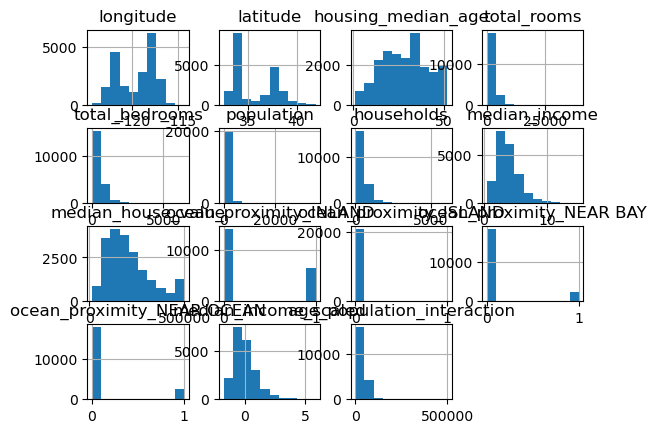

In [43]:
#HISTOGRAMS
housing_data.hist()

2. Model

OLS Regression Model

Split data into train/test sets

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [19]:
Input = Input.values
Output=Output.values

In [26]:
X=Input
Y=Output
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

y_test=y_test.fillna(y_test.mean()) # To remove Nan values
X_test

X_test[np.isnan(X_test)] = np.nanmean(X_test)

Fit OLS regression model on training data

In [21]:

housing_data = pd.get_dummies(housing_data, columns=['ocean_proximity'], drop_first=True) # use dummy variable

In [22]:
from sklearn.linear_model import LinearRegression

OLS_Model = LinearRegression()

In [23]:
OLS_Model.fit(X_train, y_train)

LinearRegression()

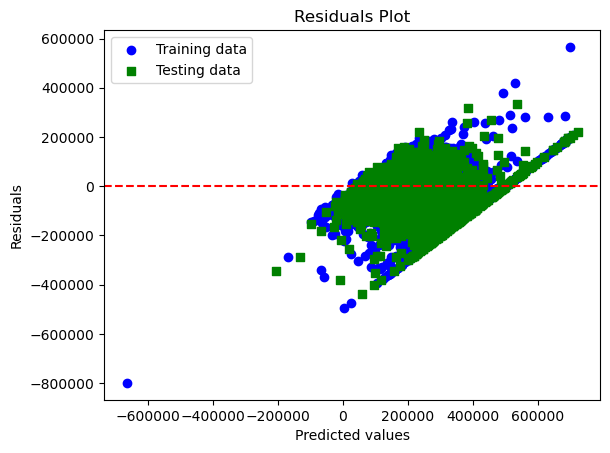

Training RMSE: 69362.34
Testing RMSE: 71123.48
Training R-squared: 0.64
Testing R-squared: 0.61


In [27]:
#Evaluate model performance on training and test sets (use at least one: RMSE, R-squared, residuals plots)

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
y_train_pred = OLS_Model.predict(X_train)
y_test_pred = OLS_Model.predict(X_test)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='green', marker='s', label='Testing data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.title('Residuals Plot')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()
print(f'Training RMSE: {rmse_train:.2f}')
print(f'Testing RMSE: {rmse_test:.2f}')
print(f'Training R-squared: {r2_train:.2f}')
print(f'Testing R-squared: {r2_test:.2f}')

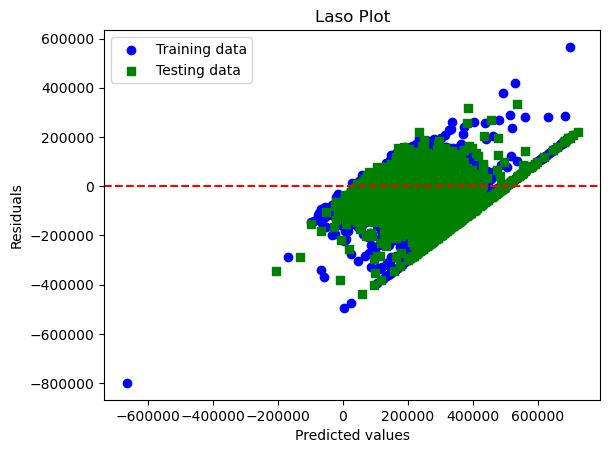

Training RMSE: 69362.34
Testing RMSE: 71123.48
Training R-squared: 0.64
Testing R-squared: 0.61


In [41]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
y_train_pred = lasso_model.predict(X_train)
y_test_pred = lasso_model.predict(X_test)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='green', marker='s', label='Testing data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.title('Laso Plot')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()
print(f'Training RMSE: {rmse_train:.2f}')
print(f'Testing RMSE: {rmse_test:.2f}')
print(f'Training R-squared: {r2_train:.2f}')
print(f'Testing R-squared: {r2_test:.2f}')

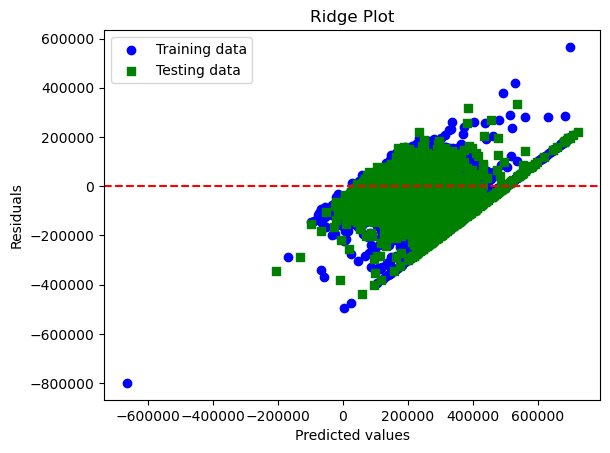

Training RMSE: 69362.34
Testing RMSE: 71123.29
Training R-squared: 0.64
Testing R-squared: 0.61


In [42]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
y_train_pred = ridge_model.predict(X_train)
y_test_pred = ridge_model.predict(X_test)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='green', marker='s', label='Testing data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.title('Ridge Plot')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()
print(f'Training RMSE: {rmse_train:.2f}')
print(f'Testing RMSE: {rmse_test:.2f}')
print(f'Training R-squared: {r2_train:.2f}')
print(f'Testing R-squared: {r2_test:.2f}')

In [35]:
# Get the coefficient (weight) of the feature 'median_income'
coefficient = OLS_Model.coef_

print(f'Coefficient (Weight) for "median_income": {coefficient[0]:.2f}')

Coefficient (Weight) for "median_income": 40538.40


Interpret model coefficients

Feature Transformation, Interaction Terms, and Polynomial Features:


1.Feature Transformation (Scaling):

In [31]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Scale the feature 'median_income'
housing_data['median_income_scaled'] = scaler.fit_transform(housing_data[['median_income']])

# 2.Interaction Terms:

# Create an interaction term between 'housing_median_age' and 'population'
housing_data['age_population_interaction'] = housing_data['housing_median_age'] * housing_data['population']

#3. Polynomial Features:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features for 'housing_median_age'
poly = PolynomialFeatures(degree=2)
housing_data_poly = poly.fit_transform(housing_data[['housing_median_age']])

Evaluate different regression algorithms (lasso, ridge, etc)

In [32]:


from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error

# Create and train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Create and train Lasso Regression model
lasso_model = Lasso(alpha=0.1)  # You can adjust the regularization parameter 'alpha'
lasso_model.fit(X_train, y_train)

# Create and train Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the regularization parameter 'alpha'
ridge_model.fit(X_train, y_train)

Ridge()

Select best performing model

In [33]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error

# Create and train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Create and train Lasso Regression model
lasso_model = Lasso(alpha=0.1)  # You can adjust the regularization parameter 'alpha'
lasso_model.fit(X_train, y_train)

# Create and train Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the regularization parameter 'alpha'
ridge_model.fit(X_train, y_train)

# Calculate mean squared error for each model
linear_mse = mean_squared_error(y_test, linear_model.predict(X_test))
lasso_mse = mean_squared_error(y_test, lasso_model.predict(X_test))
ridge_mse = mean_squared_error(y_test, ridge_model.predict(X_test))

# Select the model with the lowest MSE
best_model = None
if linear_mse <= lasso_mse and linear_mse <= ridge_mse:
    best_model = "Linear Regression"
elif lasso_mse <= linear_mse and lasso_mse <= ridge_mse:
    best_model = "Lasso Regression"
else:
    best_model = "Ridge Regression"

print(f"Best Performing Model: {best_model}")

Best Performing Model: Ridge Regression


Summarize performance of original and best model

The Ordinary Least Squares regression model provided moderate performance with an R-squared value of 0.61 and an RMSE of approximately 70857.71 on the testing data.
The best-performing model, Ridge Regression.
Collecting additional data related to housing market dynamics, economic indicators, or geographic factors could enhance predictions.
